In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import sys
sys.path.insert(1, '../Data_exploration_notebooks')

import WranglerFunctions as wf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
earnings = pd.read_csv('../Datasets/Financial_dataset/F3METL_Comp.csv', index_col=False, encoding = 'unicode_escape')
earnings = wf.F3Metl_Comp_Wrangler(earnings)
earnings

RIO LN Equity                                                      \
                 PX_OPEN   PX_HIGH    PX_LOW   PX_LAST PX_VOLUME      EBITDA   
Dates                                                                          
2000-01-04      1239.156  1243.287  1210.242  1217.677   3585947   1404.1713   
2000-01-05      1210.242  1218.503  1159.024  1163.981   3342568   1404.1713   
2000-01-06      1173.068  1218.503  1173.068  1205.286   9503906   1404.1713   
2000-01-07      1214.373  1226.764  1185.459  1220.982   7508500   1404.1713   
2000-01-10      1224.286  1226.764  1181.329  1193.720   6438418   1404.1713   
...                  ...       ...       ...       ...       ...         ...   
2022-01-25      5312.000  5353.000  5276.000  5311.000   2538309  19744.0000   
2022-01-26      5422.000  5506.000  5388.000  5434.000   2878571  19744.0000   
2022-01-27      5399.000  5623.000  5384.000  5569.000   2943232  19744.0000   
2022-01-28      5628.000  5665.000  5365.000  5386.000   6162008  19744.0000   
2022-01-31      5400.000  5409.000  5178.000  5185.000   3349054  19744.0000   

                    GLEN LN Equity                  ... EVR LN Equity          \
           PE_RATIO        PX_OPEN PX_HIGH  PX_LOW  ...     PX_VOLUME  EBITDA   
Dates                                               ...                         
2000-01-04  25.8338            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-05  24.7820            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-06  25.6770            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-07  25.8881            NaN     NaN     NaN  ...           NaN     NaN   
2000-01-10  25.3255            NaN     NaN     NaN  ...           NaN     NaN   
...             ...            ...     ...     ...  ...           ...     ...   
2022-01-25   6.1803         391.35  395.00  385.55  ...     3070741.0  2061.0   
2022-01-26   6.3346         394.65  406.00  393.55  ...     2865499.0  2061.0   
2022-01-27   6.4205         393.85  408.25  389.95  ...     2745585.0  2061.0   
2022-01-28   6.2169         402.00  403.00  389.85  ...     3847210.0  2061.0   
2022-01-31   6.0059         397.55  398.40  382.10  ...     2175911.0  2061.0   

                    BHP LN Equity                                            \
           PE_RATIO       PX_OPEN PX_HIGH  PX_LOW PX_LAST  PX_VOLUME EBITDA   
Dates                                                                         
2000-01-04      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-05      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-06      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-07      NaN           NaN     NaN     NaN     NaN        NaN   2489   
2000-01-10      NaN           NaN     NaN     NaN     NaN        NaN   2489   
...             ...           ...     ...     ...     ...        ...    ...   
2022-01-25   6.2323           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-26   6.3396           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-27   6.4637           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-28   6.3724           NaN     NaN     NaN     NaN        NaN  20181   
2022-01-31   6.3604        2426.0  2426.0  2341.5  2347.0  5257964.0  20181   

                     
           PE_RATIO  
Dates                
2000-01-04      NaN  
2000-01-05      NaN  
2000-01-06      NaN  
2000-01-07      NaN  
2000-01-10      NaN  
...             ...  
2022-01-25      NaN  
2022-01-26      NaN  
2022-01-27      NaN  
2022-01-28      NaN  
2022-01-31      NaN  

[5760 rows x 42 columns]

In [3]:
RIO_earnings = earnings['RIO LN Equity']['EBITDA'].to_frame()
RIO_earnings

,EBITDA
Dates,
2000-01-04,1404.1713
2000-01-05,1404.1713
2000-01-06,1404.1713
2000-01-07,1404.1713
2000-01-10,1404.1713
...,...
2022-01-25,19744.0000
2022-01-26,19744.0000
2022-01-27,19744.0000


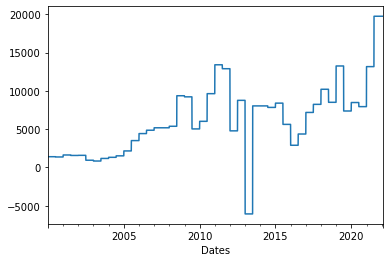

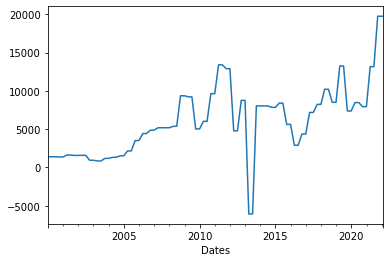

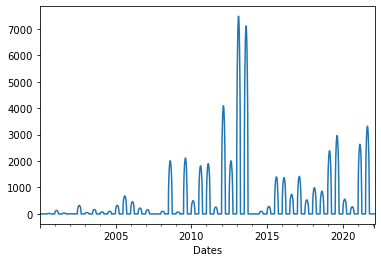

In [4]:
mean = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).mean()
std = RIO_earnings['EBITDA'].rolling('90D', min_periods=1).std()

RIO_earnings['EBITDA'].plot()
plt.show()
mean.plot()
plt.show()
std.plot()
plt.show()

In [5]:
earnings['RIO LN Equity'].loc[earnings['RIO LN Equity']['EBITDA'].drop_duplicates().index].corr()

,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,PX_VOLUME,EBITDA,PE_RATIO
PX_OPEN,1.000000,0.999850,0.999810,0.999484,-0.239973,0.744303,-0.087795
PX_HIGH,0.999850,1.000000,0.999836,0.999794,-0.237720,0.743561,-0.081101
PX_LOW,0.999810,0.999836,1.000000,0.999784,-0.244345,0.739474,-0.088540
PX_LAST,0.999484,0.999794,0.999784,1.000000,-0.243616,0.739113,-0.078522
PX_VOLUME,-0.239973,-0.237720,-0.244345,-0.243616,1.000000,-0.091089,0.142289
EBITDA,0.744303,0.743561,0.739474,0.739113,-0.091089,1.000000,-0.086170
PE_RATIO,-0.087795,-0.081101,-0.088540,-0.078522,0.142289,-0.086170,1.000000


# LSTM

Code from website below:

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

When rerunning code you have to restart the kernel and run from the start.

In [6]:
inflation_original = pd.read_csv('../Datasets/Economic_dataset/Inflation.csv', index_col = False)
clean_inflation = wf.Inflation_Unemployment_Wrangler(inflation_original)
unemployment_original = pd.read_csv('../Datasets/Economic_dataset/Unemployment.csv', index_col = False)
clean_unemployment, _ = wf.Inflation_Unemployment_Wrangler(unemployment_original)

def getEBITDAUnique(df, companyName):
    earnings_unique = df[companyName]['EBITDA'].drop_duplicates()
    earnings_unique = pd.DataFrame(earnings_unique)
    earnings_unique = earnings_unique.dropna()
    earnings_unique = earnings_unique.reset_index()
    return earnings_unique

def closest_date(dateList, date, start, end):
    if start > end:
        return (start + end) // 2

    mid = (start + end) // 2
    if date == dateList[mid]:
        return mid

    if date < dateList[mid]:
        return closest_date(dateList, date, start, mid-1)
    else:
        return closest_date(dateList, date, mid+1, end)

def add_inflation(df, inflation):
    df['Inflation Rate'] = np.nan
    i = 0
    for i in range(len(df)):
        date = df['Dates'][i]
        closestInflationDate = closest_date(inflation['Date'], date, 0, len(inflation['Date']))
        df.loc[i, 'Inflation Rate'] = inflation['Inflation Rate'][closestInflationDate]
    return df

def add_Unemployment(df, unemployment):
    df['Unemployment'] = np.nan
    i = 0
    for i in range(len(df)):
        date = df['Dates'][i]
        closestDate = closest_date(unemployment['Date'], date, 0, len(unemployment['Date']))
        df.loc[i, 'Unemployment'] = unemployment['Unemployment Rate'][closestDate]
    return df

In [7]:
RIO_unique = getEBITDAUnique(earnings, "RIO LN Equity")
add_Unemployment(RIO_unique, clean_unemployment)
add_inflation(RIO_unique, clean_inflation[0])
RIO_unique.index = RIO_unique["Dates"]
RIO_unique = RIO_unique.drop("Dates", axis = 1)
RIO_unique

,EBITDA,Unemployment,Inflation Rate
Dates,,,
2000-01-04,1404.1713,5.80,1.1
2000-06-30,1369.7180,5.60,0.8
2001-01-01,1628.6273,5.30,0.8
2001-07-02,1568.2136,4.97,1.7
2001-12-31,1583.2303,5.13,1.1
2002-07-01,945.0000,5.20,0.6
2002-12-31,840.0000,5.17,1.7
2003-06-30,1178.0000,5.00,1.1
2003-12-31,1324.0000,4.93,1.3


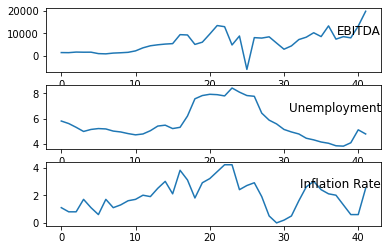

In [8]:
groups = [0, 1, 2]
i = 1
values = RIO_unique.values
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(RIO_unique.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
    
# Lag is number of datapoints it looks previously
lag = 1
reframed = series_to_supervised(scaled, lag, 1)
reframed.drop(reframed.columns[[4, 5]], axis=1, inplace=True)
reframed

IndexError: index 9 is out of bounds for axis 0 with size 6

In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 30
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# design network
model = Sequential()
lstm = LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2]))
model.add(lstm)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

## Plotting forecast

In [ ]:
yhatTrain = model.predict(train_X)
plt.plot(range(len(yhatTrain)), yhatTrain, c = 'b', marker = 'x')
plt.plot(range(len(train_y)), train_y, c = 'r', marker = 'o')

plt.plot(range(len(yhatTrain), len(RIO_unique) - 1), yhat, c = 'b', marker = 'x')
plt.plot(range(len(train_y), len(RIO_unique) - 1), test_y, c = 'r', marker = 'o')
plt.axvline(len(train_y))
plt.show()